In [1]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt;


In [31]:
df = pd.read_csv("train_digit.csv")
print(df.shape)
df_sample = df.sample(10,random_state=42)
df_sample

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30639,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12986,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41067,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30743,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6839,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
type(df_sample.index.values) , df_sample.index.values

(numpy.ndarray,
 array([ 5457, 38509, 25536, 31803, 39863, 30639, 12986, 41067, 30743,
         6839]))

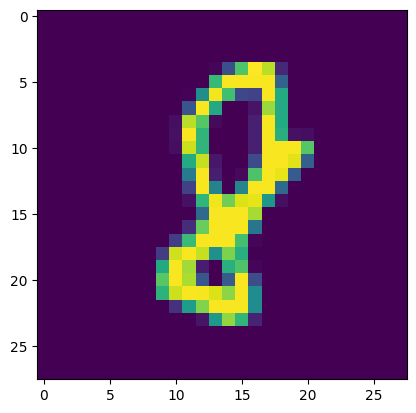

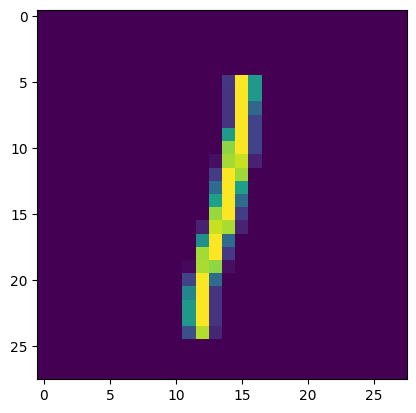

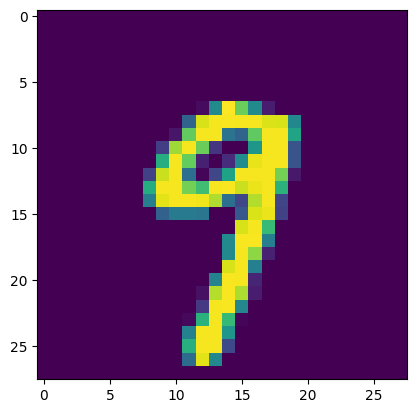

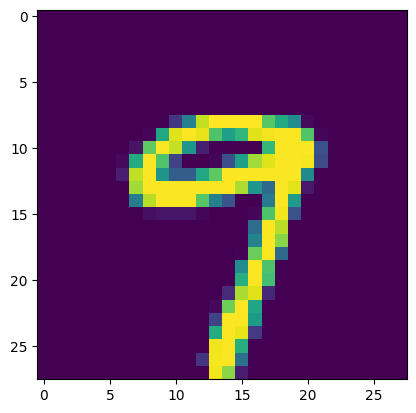

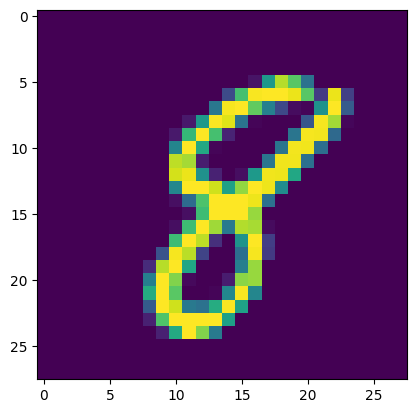

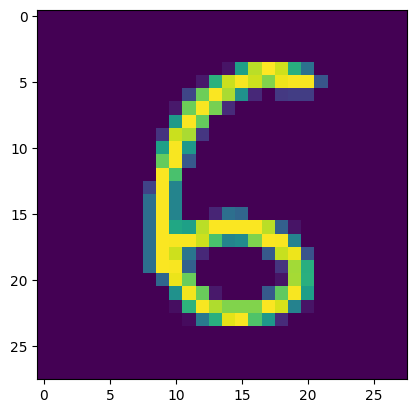

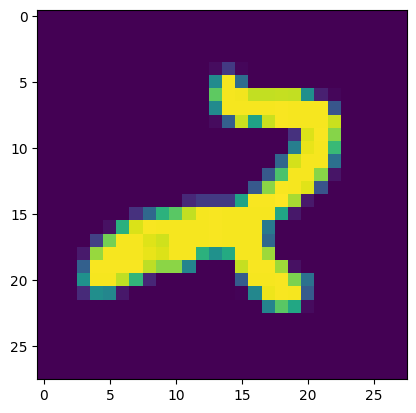

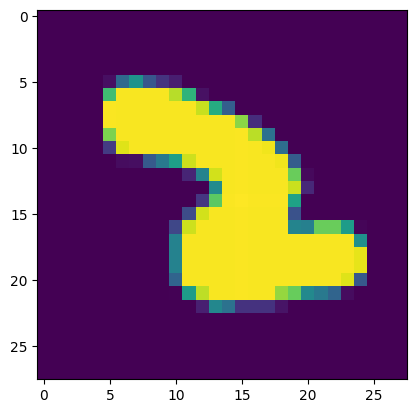

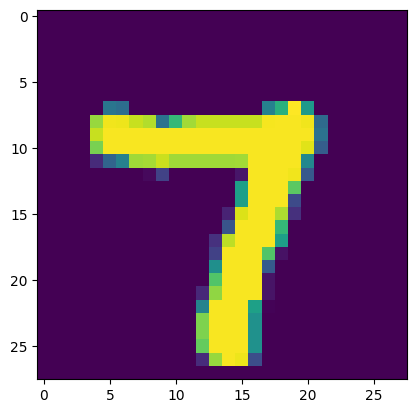

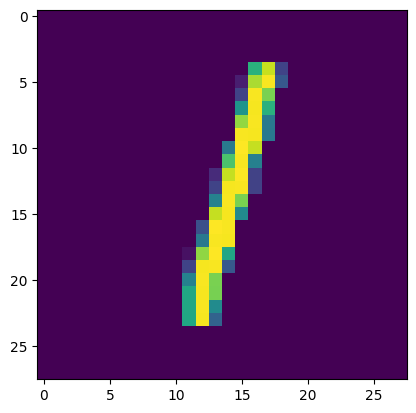

In [33]:
for index in range(df_sample.index.values.size):
    idx = df_sample.index.values[index]
    plt.imshow(df.iloc[idx,1:].values.reshape(28,28))
    plt.show()

    


In [34]:
X = df.iloc[: , 1:]
y = df.iloc[:,0]


In [62]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [63]:
X_train.shape

(33600, 784)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [66]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

6.527769327163696


In [67]:
from sklearn.metrics import accuracy_score

In [68]:
round(accuracy_score(y_test , y_pred)*100,2)

96.85

## **now use pca**

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [70]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [183]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [184]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [185]:
X_train_trf.shape , X_test_trf.shape

((33600, 100), (8400, 100))

In [186]:
knn = KNeighborsClassifier()

In [187]:
knn.fit(X_train_trf,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [188]:
y_pred = knn.predict(X_test_trf)

In [189]:
round(accuracy_score(y_test , y_pred)*100,2)

95.6

In [ ]:
scores = []
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)
    scores.append(round(accuracy_score(y_test , y_pred)*100,2))

    print(i,round(accuracy_score(y_test , y_pred)*100,2))

In [191]:
pca.explained_variance_

array([40.73371155, 29.1584279 , 26.66625685, 20.74939143, 18.15729322,
       15.8249785 , 13.78008795, 12.55468138, 11.085741  , 10.04788686,
        9.61836008,  8.63350595,  8.0586002 ,  7.89308083,  7.45030438,
        7.15454479,  6.71870889,  6.61258863,  6.43717911,  6.29134715,
        5.96165054,  5.74597684,  5.48292671,  5.3586703 ,  5.17378329,
        4.97697159,  4.87948354,  4.74715358,  4.46204507,  4.40020968,
        4.33314665,  4.26811693,  4.17486326,  4.11497365,  4.04156477,
        4.01349805,  3.83658192,  3.82490517,  3.6898565 ,  3.61243743,
        3.49540002,  3.45263514,  3.39741691,  3.29052411,  3.26194811,
        3.22025516,  3.15867388,  3.13051083,  3.09493715,  3.08968767,
        3.0156055 ,  2.9162779 ,  2.88565605,  2.84037652,  2.79205343,
        2.7491294 ,  2.71429202,  2.6467734 ,  2.62832458,  2.58678044,
        2.51403818,  2.46998488,  2.4469998 ,  2.427153  ,  2.41346777,
        2.39108417,  2.35680949,  2.30960859,  2.28678449,  2.24

In [195]:
pca.components_.shape

(100, 784)

In [196]:
pca.explained_variance_ratio_

array([0.05777659, 0.04135824, 0.03782335, 0.02943088, 0.02575426,
       0.02244611, 0.01954564, 0.01780753, 0.01572399, 0.0142519 ,
       0.01364266, 0.01224574, 0.0114303 , 0.01119553, 0.01056749,
       0.01014799, 0.0095298 , 0.00937928, 0.00913048, 0.00892363,
       0.00845599, 0.00815008, 0.00777697, 0.00760072, 0.00733848,
       0.00705932, 0.00692105, 0.00673335, 0.00632895, 0.00624125,
       0.00614612, 0.00605389, 0.00592162, 0.00583667, 0.00573255,
       0.00569274, 0.0054418 , 0.00542524, 0.00523368, 0.00512387,
       0.00495787, 0.00489721, 0.00481889, 0.00466727, 0.00462674,
       0.0045676 , 0.00448026, 0.00444031, 0.00438985, 0.00438241,
       0.00427733, 0.00413644, 0.00409301, 0.00402878, 0.00396024,
       0.00389936, 0.00384995, 0.00375418, 0.00372801, 0.00366908,
       0.00356591, 0.00350342, 0.00347082, 0.00344267, 0.00342326,
       0.00339151, 0.00334289, 0.00327594, 0.00324357, 0.00318721,
       0.00314476, 0.00307621, 0.00306749, 0.00303209, 0.00302

In [199]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [200]:

np.cumsum(pca.explained_variance_ratio_)

array([0.05777659, 0.09913484, 0.13695819, 0.16638907, 0.19214333,
       0.21458944, 0.23413508, 0.25194261, 0.2676666 , 0.2819185 ,
       0.29556116, 0.3078069 , 0.3192372 , 0.33043272, 0.34100022,
       0.35114821, 0.36067801, 0.37005728, 0.37918776, 0.38811139,
       0.39656738, 0.40471746, 0.41249443, 0.42009516, 0.42743364,
       0.43449296, 0.44141401, 0.44814736, 0.45447631, 0.46071756,
       0.46686369, 0.47291757, 0.47883919, 0.48467586, 0.4904084 ,
       0.49610114, 0.50154294, 0.50696817, 0.51220185, 0.51732573,
       0.52228359, 0.5271808 , 0.53199969, 0.53666696, 0.5412937 ,
       0.5458613 , 0.55034156, 0.55478187, 0.55917172, 0.56355412,
       0.56783145, 0.57196789, 0.5760609 , 0.58008968, 0.58404992,
       0.58794928, 0.59179923, 0.5955534 , 0.59928141, 0.60295049,
       0.6065164 , 0.61001982, 0.61349064, 0.61693331, 0.62035656,
       0.62374807, 0.62709096, 0.63036691, 0.63361048, 0.63679769,
       0.63994245, 0.64301867, 0.64608615, 0.64911824, 0.65214

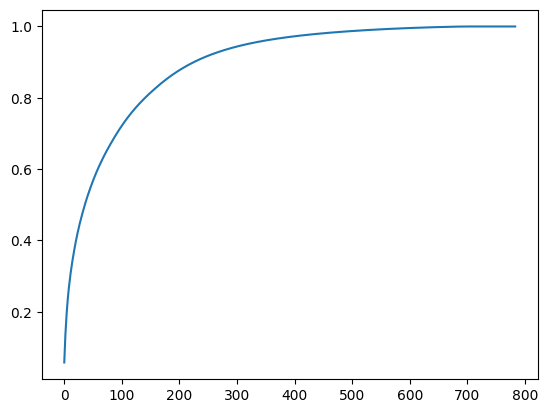

In [201]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))